<a href="https://colab.research.google.com/github/Hariom-Gupta/program/blob/master/Infosys_of_AI_Stock_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Colab, we will use a keras Long Short-Term Memory (LSTM) model to predict the stock price of Tata Global Beverages


Here are some imports we need to make: numpy for scientific computation, matplotlib for graphing, and pandas for manipulating data.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

Load training data set with the "Open" and "High" columns to use in our modeling.

In [0]:
#url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
url = "/content/drive/My Drive/Colab Notebooks/ML_Testing/infosys_data.csv"
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values

Let's take a look at the first five rows of our dataset

In [4]:
dataset_train.head()

,Date,Open,High,Low,Close
0,12/26/2018,652.75,663.25,649.00,656.80
1,12/24/2018,647.00,647.00,637.35,644.05
2,12/21/2018,657.00,658.80,647.60,649.00
3,12/20/2018,659.50,659.50,643.45,646.20
4,12/19/2018,660.00,671.55,656.40,667.05


Import MinMaxScaler from scikit-learn to scale our dataset into numbers between 0 and 1 

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

We want our data to be in the form of a 3D array for our LSTM model. First, we create data in 60 timesteps and convert it into an array using NumPy. Then, we convert the data into a 3D array with X_train samples, 60 timestamps, and one feature at each step.

In [0]:
X_train = []
y_train = []
for i in range(60, 927):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

Make the necessary imports from keras

In [7]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense 

Using TensorFlow backend.


Add LSTM layer along with dropout layers to prevent overfitting. After that, we add a Dense layer that specifies a one unit output. Next, we compile the model using the adam optimizer and set the loss as the mean_squarred_error

In [8]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
867/867 [==============================] - 6s 7ms/step - loss: 0.0216
Epoch 2/100
867/867 [==============================] - 4s 5ms/step - loss: 0.0090
Epoch 3/100
867/867 [==============================] - 4s 5ms/step - loss: 0.0073
Epoch 4/100
867/867 [==============================] - 4s 5ms/step - loss: 0.0064
Epoch 5/100
867/867 [==============================] - 4s 4ms/step - loss: 0.0064
Epoch 6/100
867/867 [==============================] - 4s 5ms/step - loss: 0.0055
Epoch 7/100
867/867 [==============================] - 4s 4ms/step - loss: 0.0055
Epoch 8/100
867/867 [==============================] - 4s 4ms/step - loss: 0.0050
Epoch 9/100
867/867 [==============================] - 4s 4ms/step - loss: 0.0046
Epoch 10/100
867/867 [==============================] - 4s 4ms/step - loss: 0.0043
Epoch 11/100
867/867 [==============================] - 4s 5ms/step - loss: 0.0043
Epoch 12/100
867/867 [==============================] - 4s 5ms/step - loss: 0.0042
Epoch 13/100


Import the test set for the model to make predictions on 

In [0]:
#url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
url = "/content/drive/My Drive/Colab Notebooks/ML_Testing/infosys_test.csv"
dataset_test = pd.read_csv(url)

real_stock_price = dataset_test.iloc[:, 1:2].values

Before predicting future stock prices, we have to manipulate the training set; we merge the training set and the test set on the 0 axis, set the time step to 60, use minmaxscaler, and reshape the dataset as done previously. After making predictions, we use inverse_transform to get back the stock prices in normal readable format.


In [10]:
dataset_test.head()

,Date,Open,High,Low,Close
0,12/31/2019,729.70,737.75,725.45,731.15
1,12/30/2019,736.10,737.95,727.25,732.90
2,12/27/2019,729.75,737.50,728.85,736.95
3,12/26/2019,732.00,734.55,726.55,728.95
4,12/24/2019,736.95,736.95,728.30,733.40


In [11]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 308):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print('Done', inputs.size,X_test.size)

Done 309 14880


Plot our predicted stock prices and the actual stock price

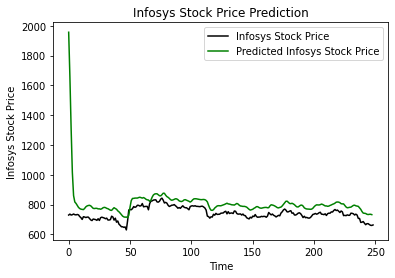

In [13]:
plt.plot(real_stock_price, color = 'black', label = 'Infosys Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Infosys Stock Price')
plt.title('Infosys Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Infosys Stock Price')
plt.legend()
plt.show()